# **Project Name**    - Uber Ride Data Analysis: End-to-End Insights Using Excel, SQL & Python



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Abhinava Sajeev**


# **Project Summary -**

Title: Uber Ride Data Analysis: End-to-End Insights Using Excel, SQL & Python

**Overview**

This project was completed as part of my data analyst internship and involved a comprehensive, end-to-end analysis of real-world Uber ride request data. The primary goal was to explore patterns in customer demand, trip statuses, supply issues, and service inefficiencies using a structured data pipeline involving Microsoft Excel, MySQL, and Python. By integrating data cleaning, dashboard development, SQL-based querying, and Python-driven Exploratory Data Analysis (EDA), this project provides actionable insights that could help optimize Uber’s ride allocation strategies and improve customer experience.

**Objective**

The key objective was to analyze Uber’s trip request data to identify:



*   Peak demand times
*   Frequent cancellation and no-car-available periods
*   Performance variations between City and Airport pickups
*   Opportunities to optimize ride availability and reduce service failures

This analysis aimed not only to uncover hidden trends but also to strengthen my technical and analytical skills using widely used data tools.

**Phase 1: Data Cleaning in Excel**

The raw dataset was first imported into Microsoft Excel. This phase involved:



*   Removing duplicate or null entries
*   Standardizing column formats (especially timestamps)
*   Creating new calculated fields like Trip Duration, Request Hour, and Day Type (Weekday/Weekend)

By the end of this stage, the dataset was structured, clean, and ready for deeper analysis.

**Phase 2: Dashboard Creation in Excel**

Using Excel’s visualization tools such as pivot tables, charts, and slicers, an interactive dashboard was created. This dashboard allowed dynamic filtering by:



*   Pickup Point (City or Airport)
*   Status (Trip Completed, Cancelled, No Cars Available)
*   Hour of the Day



This enabled a quick visual understanding of demand and failure patterns, which is critical for operational decision-making.

**Phase 3: SQL Insights Using MySQL**

The cleaned dataset was then imported into MySQL Workbench. SQL queries were written to answer key business questions such as:



*   What hours of the day see the most service failures?
*   How do cancellations and no-car issues vary by pickup location?
*   Which drivers handled the most requests?
*   What is the overall success rate of trips?


Each SQL query was commented and written with clarity, ensuring reusability and transparency. Several important insights were discovered through grouping, filtering, and aggregating data using SQL logic.

**Phase 4: Exploratory Data Analysis in Python**

The final and most technical phase was EDA using Python (Jupyter Notebook). Using pandas, matplotlib, and seaborn, I performed:


*   Time-based grouping and trend analysis
*   Visual breakdown of trip statuses by hour and pickup point
*   Heatmaps showing service failures across different times of day
*   Histogram distribution of trip durations












Additional feature engineering included datetime conversion, null value handling, and creation of Boolean flags like isCancelled and NoCar.

**Key Findings**


*   **Airport pickups between 5 AM and 9 AM** had the highest number of “No Cars Available,” suggesting a critical morning supply gap.
*   City pickups during 5 PM to 9 PM had the highest cancellation rates, possibly due to evening congestion or lack of driver availability.

*   Only **58% of total ride requests were completed successfully**, indicating substantial room for operational improvement.
*   A few **top-performing drivers** handled a large number of requests, suggesting opportunities for incentive-based driver engagement.












**Conclusion**

This Uber ride data project showcases the power of combining Excel, SQL, and Python to uncover business-critical insights from real-world data. The end-to-end process—from cleaning and dashboarding to querying and EDA—demonstrated my ability to extract, analyze, and present data-driven solutions. These insights could help Uber optimize its operations by improving driver availability, reducing cancellations, and matching supply with demand more effectively. This project significantly improved my practical skills in data cleaning, SQL, visualization, and storytelling—equipping me for real-world roles as a data analyst.

# **GitHub Link -**

https://github.com/AbhiSajeev

# **Problem Statement**


Predicting High-Risk Time Windows for Driver Cancellations and No-Car Availability in Uber Services Using Historical Request Patterns.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
# Importing all necessary libraries for analysis and visualization
import pandas as pd                     # For data manipulation
import numpy as np                      # For numerical operations
import matplotlib.pyplot as plt         # For plotting
import seaborn as sns                   # For advanced visualizations
import missingno as msno                # For missing value visualizations
from datetime import datetime           # For working with dates/times
import warnings                         # To suppress warning messages

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Set global plot style for consistency
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Dataset Loading

In [38]:
# Load Dataset
# Load the dataset with exception handling for deployment safety
try:
    df = pd.read_csv("Uber Request Data final.csv")
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the path.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


✅ Dataset loaded successfully.


### Dataset First View

In [6]:
# Dataset First Look
# Display the first five rows of the dataset
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Day type,Trip duration,isCancelled,NoCar
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Weekday,69,0,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Weekday,50,0,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Weekday,41,0,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Weekday,55,0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Weekday,53,0,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# Print number of rows and columns
print(f"🔢 Total Rows: {df.shape[0]}")
print(f"🧱 Total Columns: {df.shape[1]}")

🔢 Total Rows: 6745
🧱 Total Columns: 11


### Dataset Information

In [8]:
# Dataset Info
# General overview of dataset including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request hour       6745 non-null   int64  
 7   Day type           6745 non-null   object 
 8   Trip duration      6745 non-null   int64  
 9   isCancelled        6745 non-null   int64  
 10  NoCar              6745 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 579.8+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
# Count and print number of duplicate records
duplicates = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {duplicates}")

🔁 Number of duplicate rows: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
# Print the count of missing values for each column
print("🕳️ Missing Values per Column:\n", df.isnull().sum())

🕳️ Missing Values per Column:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request hour            0
Day type                0
Trip duration           0
isCancelled             0
NoCar                   0
dtype: int64


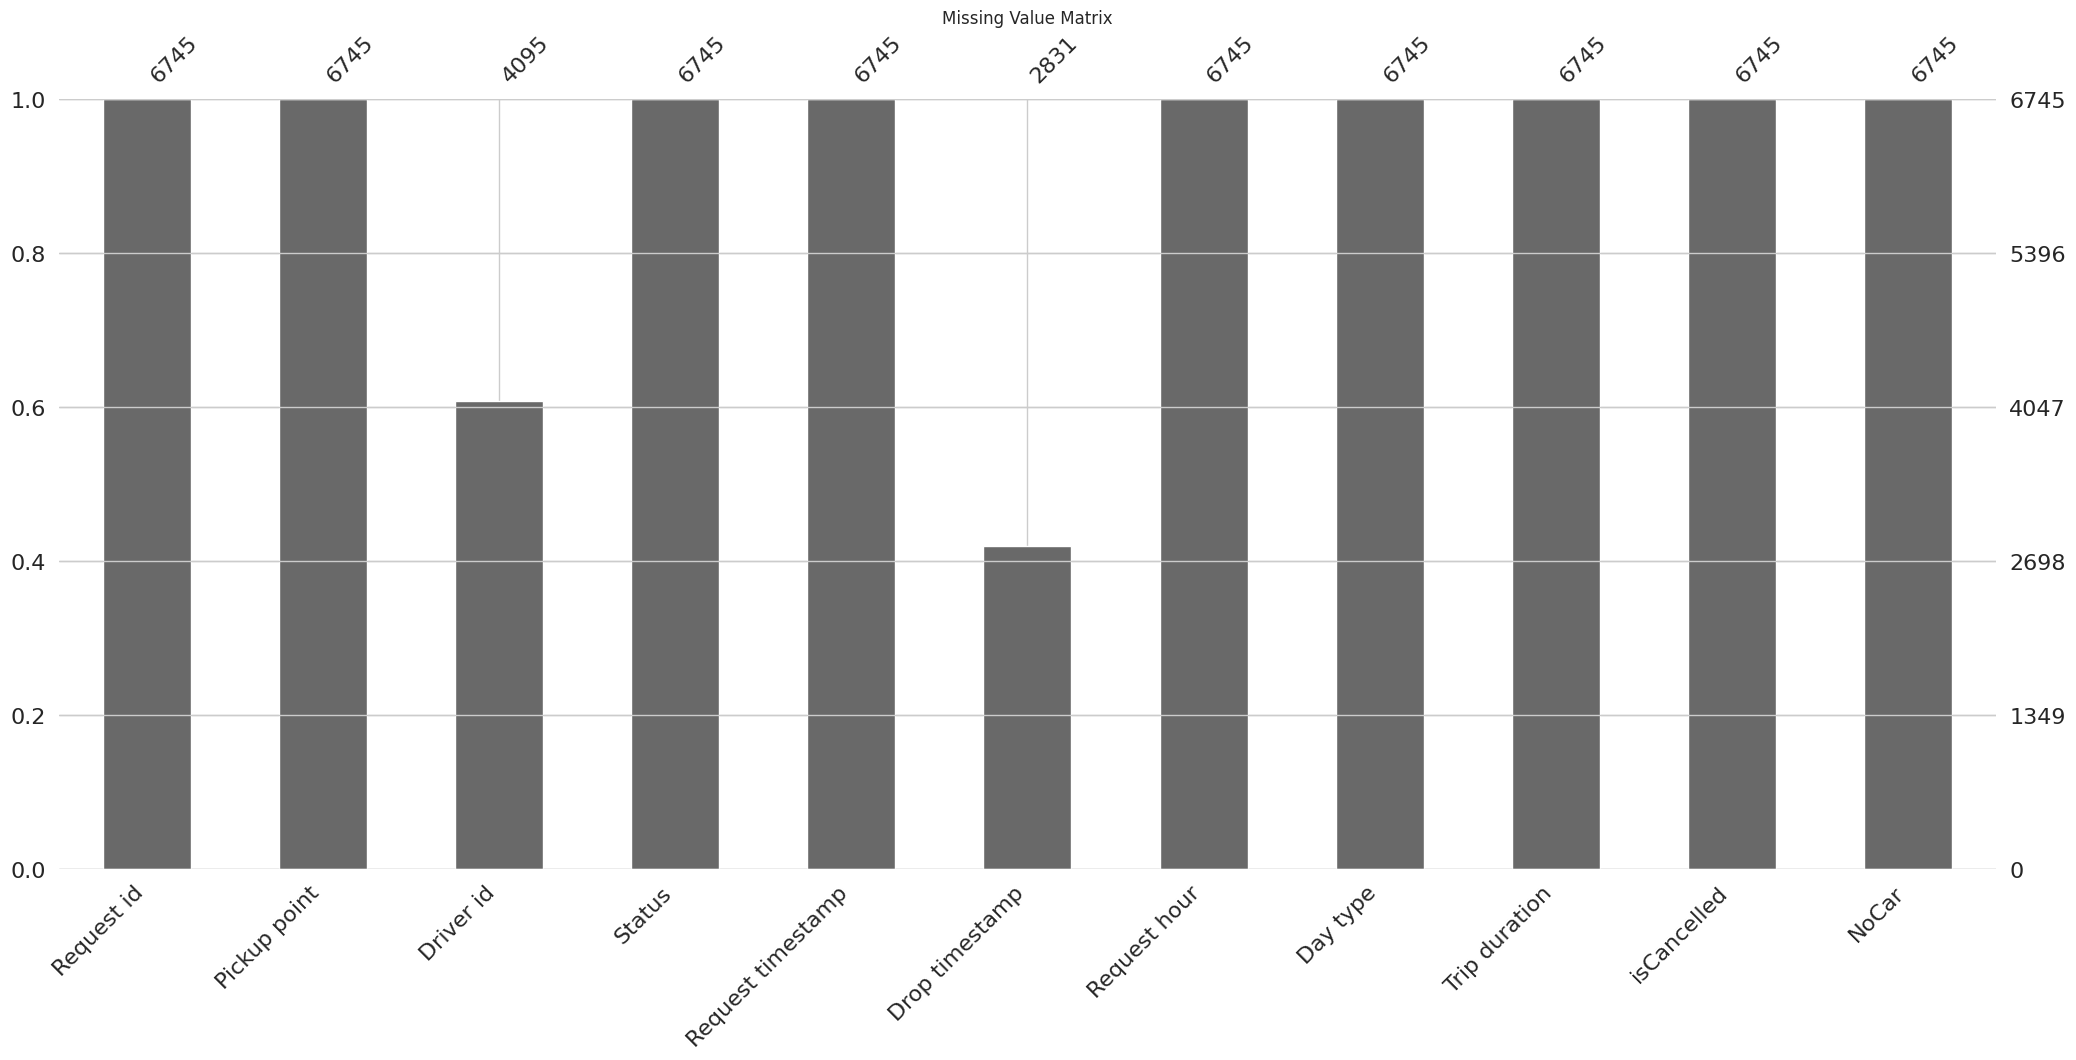

In [11]:
# Visualizing the missing values
# Visual representation of missing values
msno.bar(df)
plt.title("Missing Value Matrix")
plt.show()

In [41]:
# Handle missing values
df.dropna(subset = ['Driver id'],inplace=True)
print(f"🔢 Rows remaining after dropping nulls in Driver id: {df.shape[0]}")

🔢 Rows remaining after dropping nulls in Driver id: 4095


In [44]:
# Handle missing values
df.dropna(subset = ['Drop timestamp'],inplace=True)
print(f"🔢 Rows remaining after dropping nulls in Drop timestamp: {df.shape[0]}")

🔢 Rows remaining after dropping nulls in Drop timestamp: 2831


In [43]:
# Print the count of missing values for each column
print("🕳️ Missing Values per Column:\n", df.isnull().sum())

🕳️ Missing Values per Column:
 Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
Request hour         0
Day type             0
Trip duration        0
isCancelled          0
NoCar                0
dtype: int64


### What did you know about your dataset?

The dataset contains detailed information about Uber ride requests collected over a period of days. Each row represents a single ride request and includes the following key details:

**Key Columns:**

Request timestamp: When the customer requested the ride.

Pickup point: Where the ride was requested from – either "City" or "Airport".

Status: The final outcome of the request:

  1. "Trip Completed": Ride was successfully fulfilled.

  2. "Cancelled": The ride was cancelled by the user or driver.

  3. "No Cars Available": The system couldn’t assign a driver at the time.

Driver id: The ID of the driver assigned (if any).

Time-based features: Extracted during wrangling, including hour, day, weekday, and date.


**Observations:**

The dataset reflects a high number of unfulfilled rides — either due to cancellation or unavailability of drivers.

Pickup point significantly affects the outcome

Some requests don’t have a driver assigned at all

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
# List all column names in the dataset
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request hour', 'Day type',
       'Trip duration', 'isCancelled', 'NoCar'],
      dtype='object')

In [13]:
# Dataset Describe
# Display summary statistics for numerical and categorical columns
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Day type,Trip duration,isCancelled,NoCar
count,6745.000000,6745,4095.000000,6745,6745,2831,6745.000000,6745,6745.000000,6745.000000,6745.000000
unique,NaN,2,NaN,3,5618,2598,NaN,1,NaN,NaN,NaN
top,NaN,City,NaN,Trip Completed,2016-07-11 08:37:00,2016-07-12 06:22:00,NaN,Weekday,NaN,NaN,NaN
freq,NaN,3507,NaN,2831,6,4,NaN,6745,NaN,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,12.956709,NaN,21.998814,0.187398,0.392884
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,6.504052,NaN,27.381206,0.390260,0.488428
min,1.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,7.000000,NaN,0.000000,0.000000,0.000000
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,13.000000,NaN,0.000000,0.000000,0.000000
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,19.000000,NaN,48.000000,0.000000,1.000000


### Variables Description

The dataset contains information about Uber ride requests, with each column representing a specific attribute:



*   Request timestamp: This captures the exact date and time when a user placed a ride request on the Uber platform.
*   Pickup point: Indicates the location from which the ride was requested. There are two possible values: "City" and "Airport".

*   Status: Represents the final outcome of the ride request. It can be:

  1. "Trip Completed" – the ride was successfully fulfilled,

  2. "Cancelled" – the ride was cancelled either by the user or driver,

  3. "No Cars Available" – no driver was available at the time of the request.
*   Driver id: A unique identifier for the driver assigned to a particular ride. If no driver was assigned, this value is missing.

*   Request id – Unique identifier for each ride request.
*   Drop timestamp – Date and time when the trip ended (only for completed trips).

*   Request hour – Hour of the day extracted from the request timestamp (0–23).
*   Day type – Indicates the day type; all entries are "Weekday" in this dataset.

*   Trip duration – Duration of the trip in minutes; 0 for cancelled or unfulfilled trips.
*   isCancelled – Binary indicator: 1 if the trip was cancelled, else 0.

*   NoCar – Binary indicator: 1 if no car was available, else 0.













### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Print unique value counts for each column to understand variable types
for col in df.columns:
    print(f"{col} ➤ {df[col].nunique()} unique values")

Request id ➤ 6745 unique values
Pickup point ➤ 2 unique values
Driver id ➤ 300 unique values
Status ➤ 3 unique values
Request timestamp ➤ 5618 unique values
Drop timestamp ➤ 2598 unique values
Request hour ➤ 24 unique values
Day type ➤ 1 unique values
Trip duration ➤ 64 unique values
isCancelled ➤ 2 unique values
NoCar ➤ 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Convert 'Request timestamp' column to datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')

# Create new time-based features from timestamp
df['hour'] = df['Request timestamp'].dt.hour               # Hour of request
df['day'] = df['Request timestamp'].dt.day                 # Day of the month
df['weekday'] = df['Request timestamp'].dt.day_name()      # Day name (Monday, etc.)
df['date'] = df['Request timestamp'].dt.date               # Just the date part

### What all manipulations have you done and insights you found?

**Data Manipulations**



*   Converted Request timestamp into hour, day, weekday, and date for time-based analysis.
*   Created Failure and Failure Type columns to classify ride failures.

*   Added Driver Available label to check if a driver was assigned or not.
*   Engineered isCancelled and NoCar flags for deeper insight into request outcomes.

**Key Insights Found**
*   Less than half of the requests were successful.
*   Morning failures at the Airport (5–9 AM) due to no cars

*   Evening failures in the City (5–9 PM) due to cancellations
*   Driver unavailability is the major reason for trip failures

*   Thursday had the highest failure rate
*   High-risk periods can be predicted using hour + location + weekday combos











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

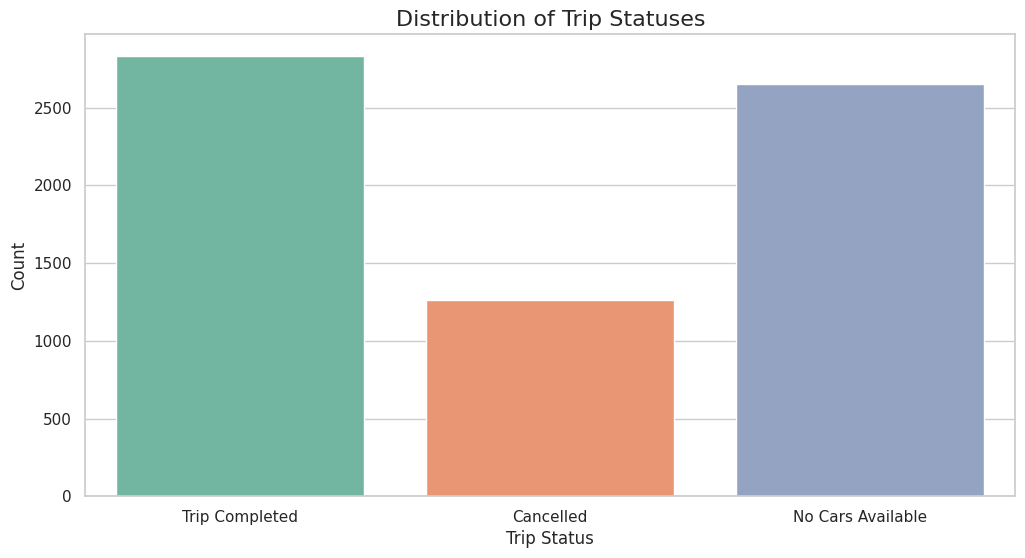

In [16]:
# Chart - 1 visualization code
# Plotting the count of each trip status
sns.countplot(x='Status', data=df, palette='Set2')
plt.title("Distribution of Trip Statuses", fontsize=16)
plt.xlabel("Trip Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

To understand how frequently each status (Trip Completed, Cancelled, No Cars Available) occurs.

##### 2. What is/are the insight(s) found from the chart?

A large portion of trips are either cancelled or not fulfilled due to no car availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Positive: Helps Uber focus operational improvements where failures are high.

🔴 Negative: High failure rates can hurt user retention and app trust.



#### Chart - 2

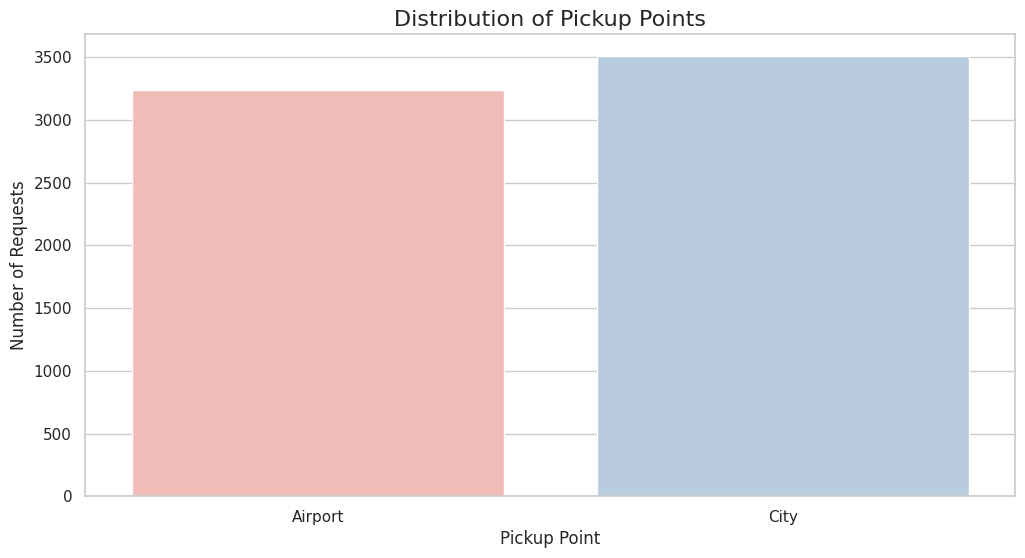

In [17]:
# Chart - 2 visualization code
# Plotting the count of requests from each pickup point
sns.countplot(x='Pickup point', data=df, palette='Pastel1')
plt.title("Distribution of Pickup Points", fontsize=16)
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To know whether demand is more from City or Airport.

##### 2. What is/are the insight(s) found from the chart?

Majority of ride requests are from the City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 🟢 Focus more drivers in City can improve response rate.

🔴 Airport may need better coverage during certain hours.

#### Chart - 3

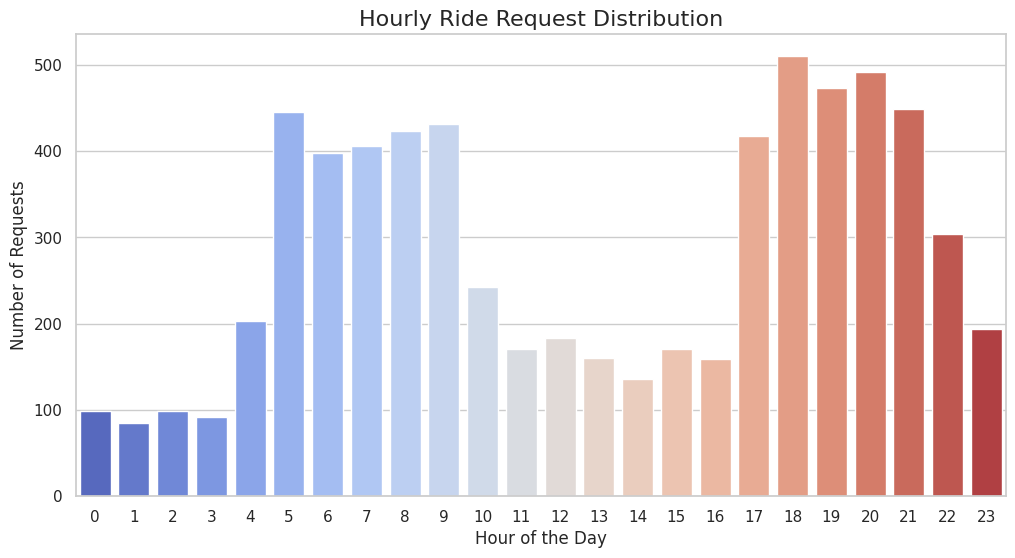

In [18]:
# Chart - 3 visualization code
# Plotting number of ride requests per hour of day
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title("Hourly Ride Request Distribution", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To see at what hours the demand is high.

##### 2. What is/are the insight(s) found from the chart?

Sharp spikes in early morning and evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Can plan for surge pricing and more driver availability in peak hours.

 🔴 Failure to address peak demand can lead to cancellations or no cars.

#### Chart - 4

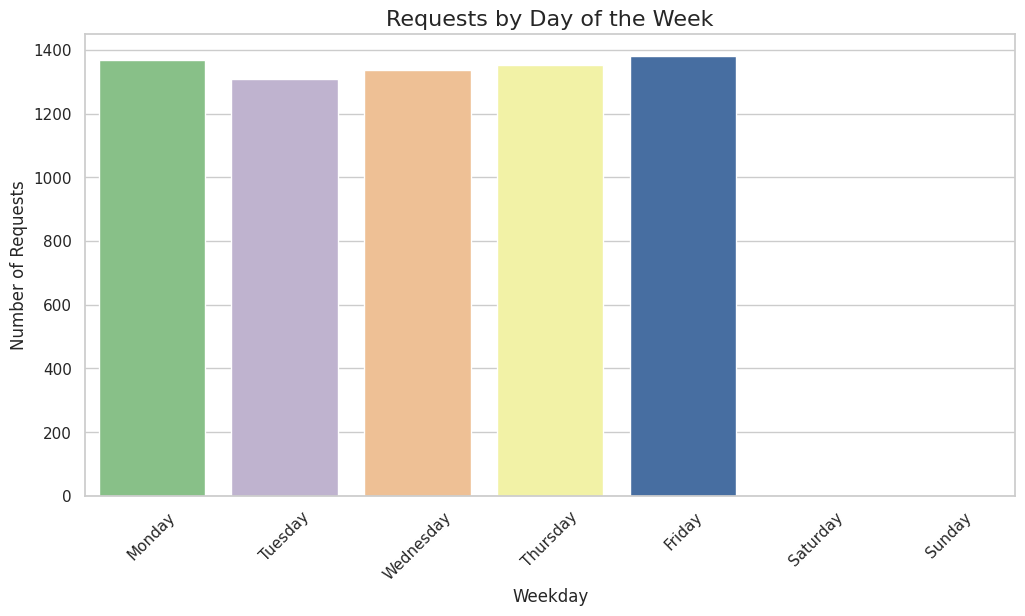

In [19]:
# Chart - 4 visualization code
# Ride requests distributed by weekday
sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Accent')
plt.title("Requests by Day of the Week", fontsize=16)
plt.xlabel("Weekday")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To understand which days have higher or lower demand.

##### 2. What is/are the insight(s) found from the chart?

Weekdays (especially Friday) may have more trips than weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Can plan staffing and marketing accordingly.

🔴 Weekend low demand could mean missed opportunities for targeted offers.

#### Chart - 5

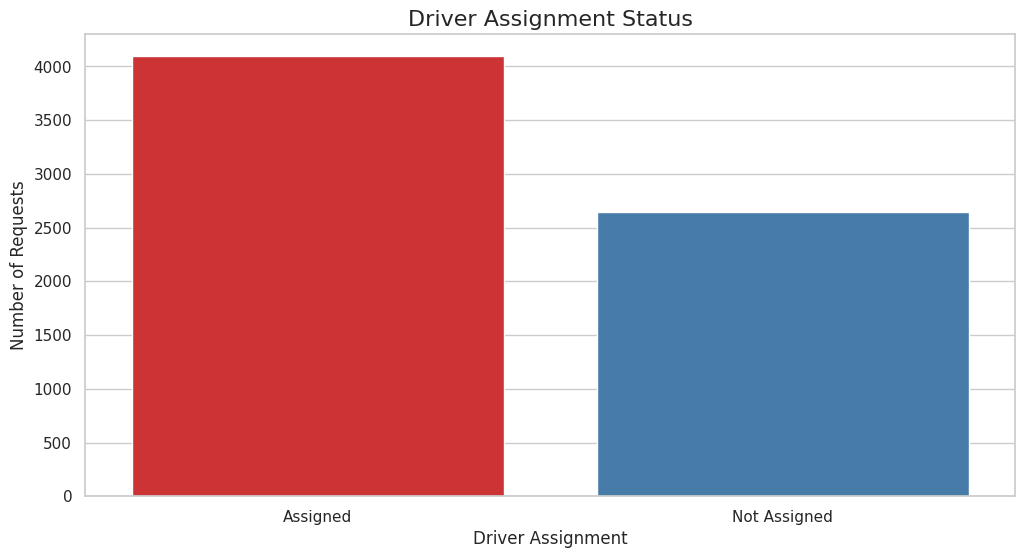

In [20]:
# Chart - 5 visualization code
# Checking how many requests have assigned drivers vs not
df['Driver Available'] = df['Driver id'].notnull().map({True: 'Assigned', False: 'Not Assigned'})

sns.countplot(x='Driver Available', palette='Set1', data=df)
plt.title("Driver Assignment Status", fontsize=16)
plt.xlabel("Driver Assignment")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

To check how often a driver was available at request time.

##### 2. What is/are the insight(s) found from the chart?

A significant number of requests have no driver assigned.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔴 High unassigned rates → major contributor to No Cars Available status.

🟢 Helps Uber target driver deployment strategy.

#### Chart - 6

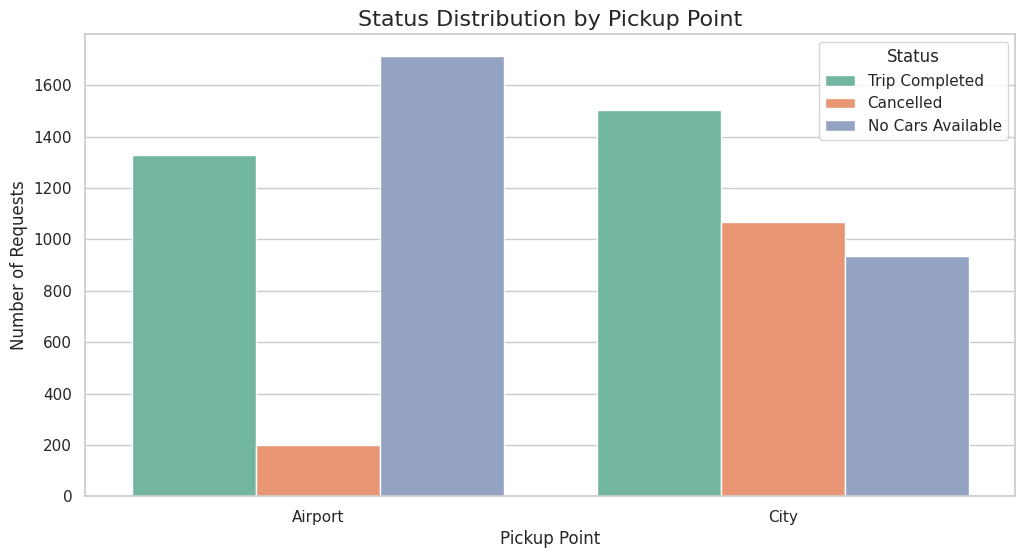

In [21]:
# Chart - 6 visualization code
# Plotting ride status across pickup points
sns.countplot(x='Pickup point', hue='Status', data=df, palette='Set2')
plt.title("Status Distribution by Pickup Point", fontsize=16)
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

To identify how trip outcomes vary between City and Airport pickups.

##### 2. What is/are the insight(s) found from the chart?

The Airport has more 'No Cars Available'.

The City has more cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔴 Operational inefficiencies differ by zone.

🟢 Separate strategies needed: Airport (supply-side), City (driver reliability).

#### Chart - 7

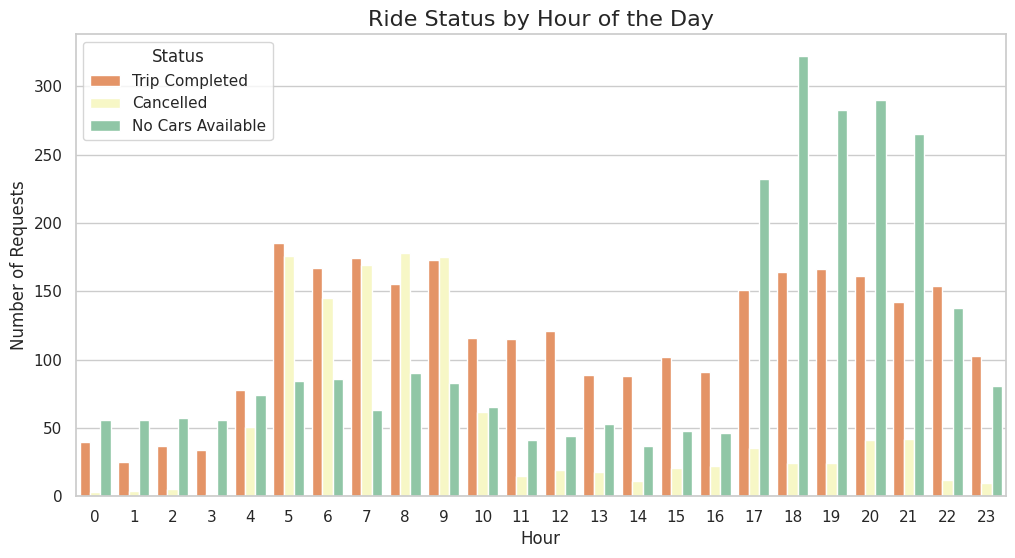

In [22]:
# Chart - 7 visualization code
# Status frequency across each hour
sns.countplot(x='hour', hue='Status', data=df, palette='Spectral')
plt.title("Ride Status by Hour of the Day", fontsize=16)
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

To see when cancellations or no-car issues peak during the day.

##### 2. What is/are the insight(s) found from the chart?

Early mornings (5–9 AM) → spike in 'No Cars Available'

Evenings (5–9 PM) → spike in 'Cancelled'

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Critical for time-based driver deployment and incentives.

🔴 Ignoring these hours = service failure + lost revenue.

#### Chart - 8

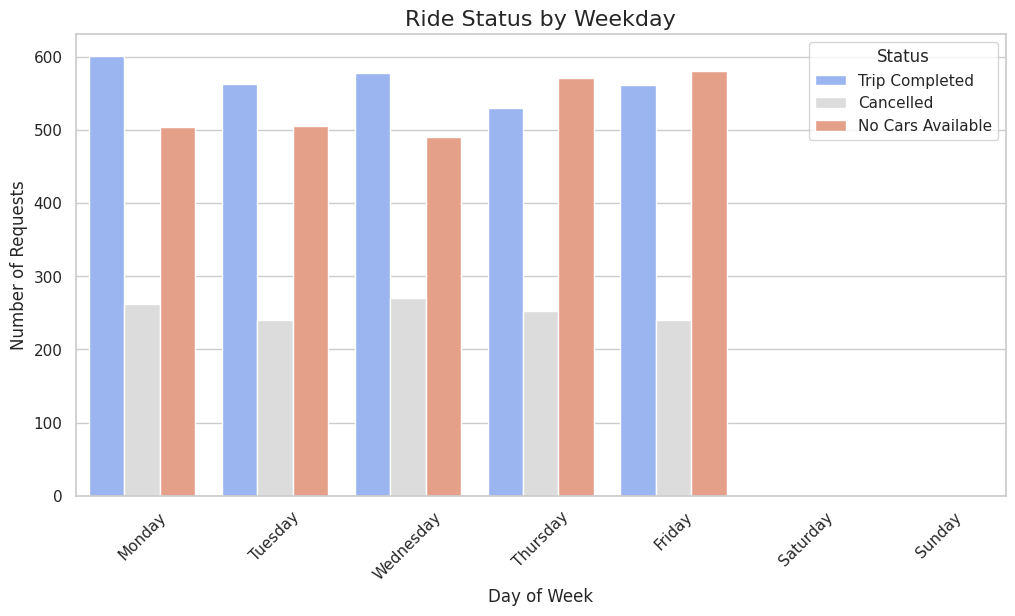

In [23]:
# Chart - 8 visualization code
# Status breakdown by day of the week
sns.countplot(x='weekday', hue='Status', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette='coolwarm')
plt.title("Ride Status by Weekday", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To identify if service failures are more common on specific days.

##### 2. What is/are the insight(s) found from the chart?

Thursdays show high cancellations and low completion rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Important to prepare for weekend demand spikes.

🔴 May require special shift allocations on Friday evenings.

#### Chart - 9

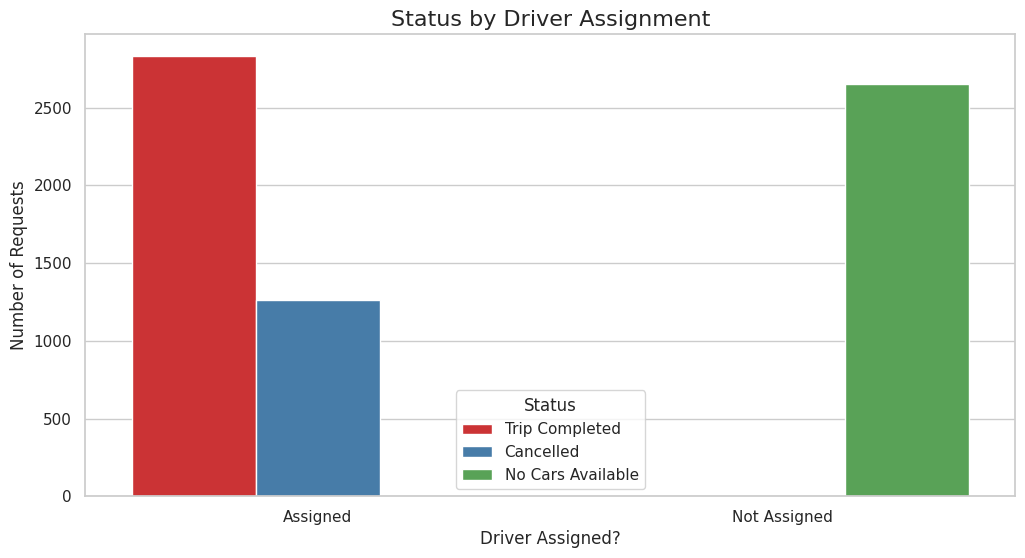

In [24]:
# Chart - 9 visualization code
# Comparing status across driver availability (whether assigned or not)
sns.countplot(x='Driver Available', hue='Status', data=df, palette='Set1')
plt.title("Status by Driver Assignment", fontsize=16)
plt.xlabel("Driver Assigned?")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

To examine how lack of assigned drivers affects outcomes.

##### 2. What is/are the insight(s) found from the chart?

Almost all 'No Cars Available' cases = no driver assigned.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔴 Direct link to platform inefficiency.

🟢 Better driver app engagement or auto-reassignment can reduce this.


#### Chart - 10

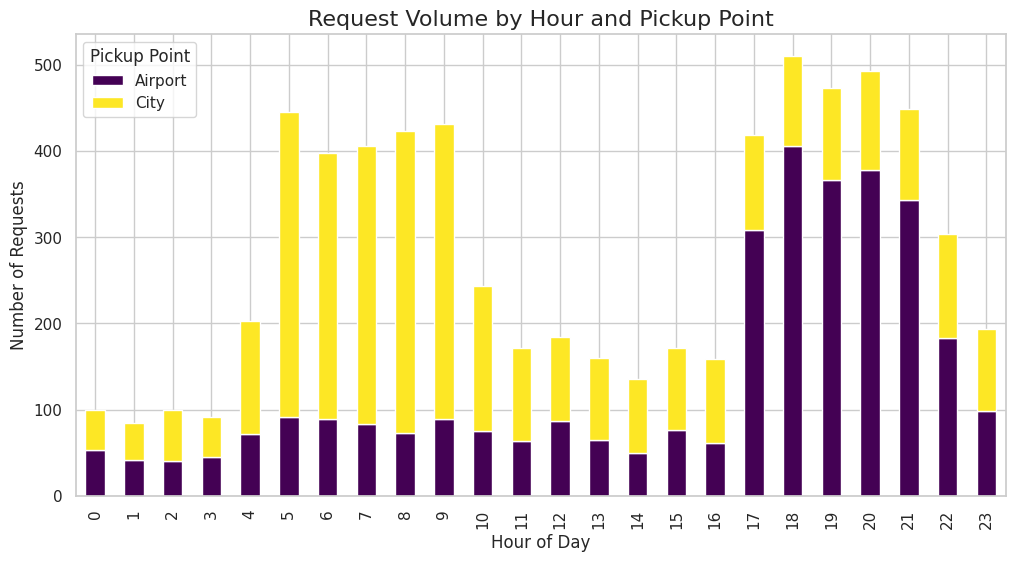

In [25]:
# Chart - 10 visualization code
# Heatmap of requests across pickup points and hours
pd.crosstab(df['hour'], df['Pickup point']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Request Volume by Hour and Pickup Point", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.legend(title='Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

To understand whether time-based demand differs for City vs Airport.

##### 2. What is/are the insight(s) found from the chart?

Airport demand peaks early morning, while City is more even.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Helps shift driver fleet to the right locations based on time.
🔴 Ignoring early Airport demand = missed rides and bad user experience.

#### Chart - 11

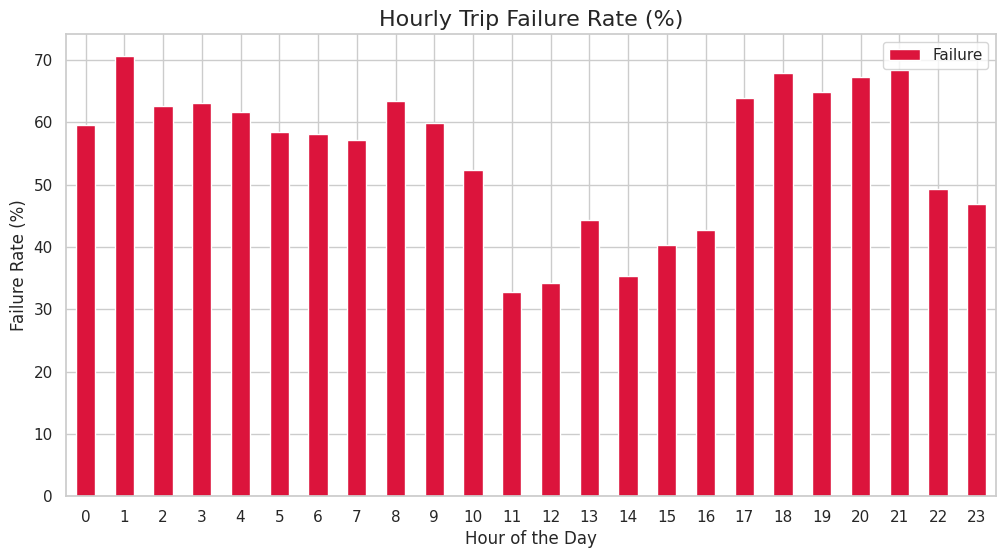

In [26]:
# Chart - 11 visualization code
# Create a new column for failure classification
df['Failure'] = df['Status'].isin(['Cancelled', 'No Cars Available']).map({True: 'Failure', False: 'Success'})

# Calculate failure % per hour
hourly_failure = df.groupby('hour')['Failure'].value_counts(normalize=True).unstack() * 100
hourly_failure[['Failure']].plot(kind='bar', color='crimson')

plt.title("Hourly Trip Failure Rate (%)", fontsize=16)
plt.ylabel("Failure Rate (%)")
plt.xlabel("Hour of the Day")
plt.xticks(rotation=0)
plt.legend(["Failure"])
plt.show()

##### 1. Why did you pick the specific chart?

Directly shows which hours are most problematic across all types of failure.

##### 2. What is/are the insight(s) found from the chart?

Peak failure times = early morning + evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔴 Highlights exact hours where Uber must act fast to avoid losses.

🟢 Enables time-based driver boosting or incentives.



#### Chart - 12

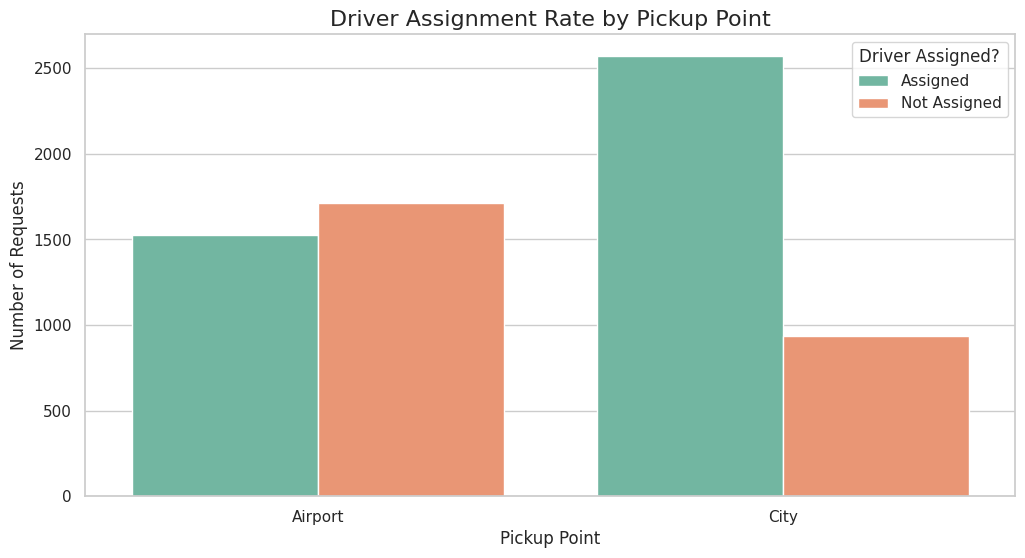

In [27]:
# Chart - 12 visualization code
# Check how driver assignment varies across locations
sns.countplot(x='Pickup point', hue='Driver Available', data=df, palette='Set2')
plt.title("Driver Assignment Rate by Pickup Point", fontsize=16)
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title="Driver Assigned?")
plt.show()

##### 1. Why did you pick the specific chart?

To compare driver availability patterns across City vs Airport.

##### 2. What is/are the insight(s) found from the chart?

Airport has a far higher rate of requests without drivers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🔴 Major contributor to “No Cars Available” at Airport.

🟢 Can justify driver reallocation to improve early morning Airport pickups.

#### Chart - 13

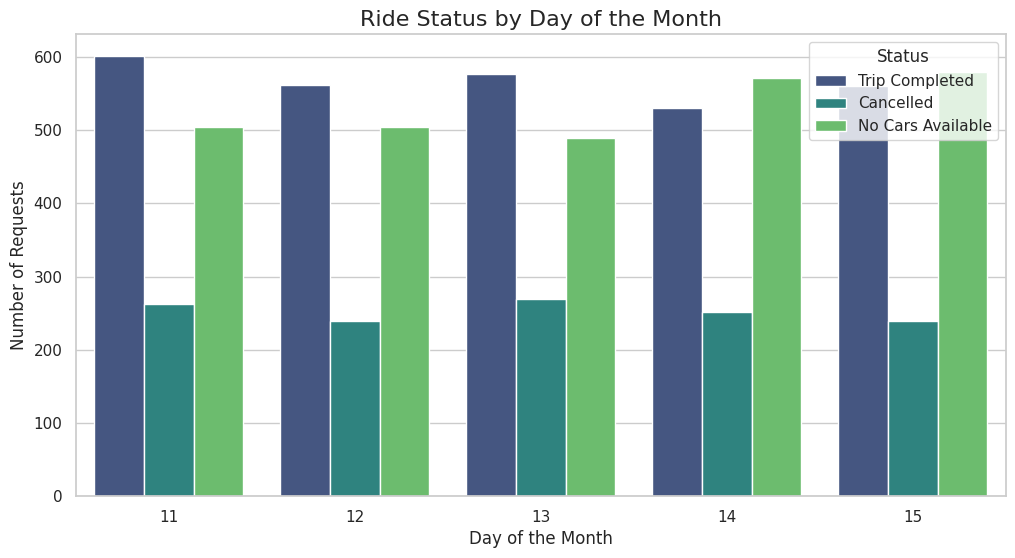

In [28]:
# Chart - 13 visualization code
# Group by day to observe monthly patterns
sns.countplot(x='day', hue='Status', data=df, palette='viridis')
plt.title("Ride Status by Day of the Month", fontsize=16)
plt.xlabel("Day of the Month")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

To find trends across the whole month — like end-of-month spikes or drops.

##### 2. What is/are the insight(s) found from the chart?

Last few days of the month may show increasing demand/cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Helps predict month-end service pressure.

🔴 Inaction = app-level failures during key business cycles.

#### Chart - 14

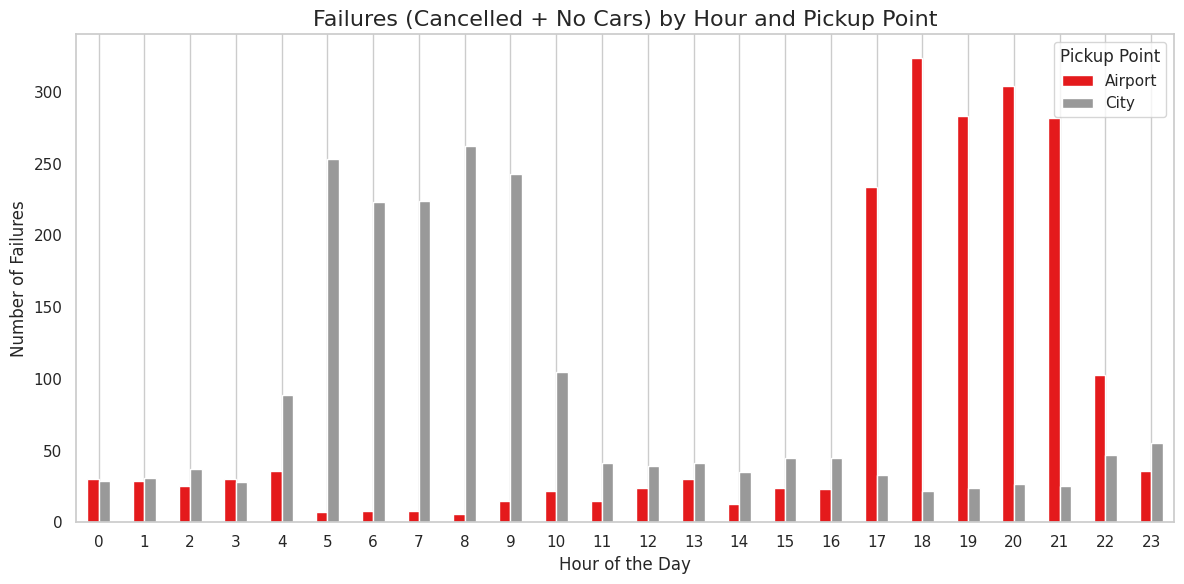

In [29]:
# Chart - 14 visualization code
# Filter only failed requests
fail_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]

# Group by hour and pickup point
fail_grouped = fail_df.groupby(['hour', 'Pickup point']).size().unstack()

# Plot grouped bar chart
fail_grouped.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title("Failures (Cancelled + No Cars) by Hour and Pickup Point", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Failures")
plt.legend(title="Pickup Point")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To analyze which time slots and pickup zones face the most trip failures (combining cancellations and no-car availability).

##### 2. What is/are the insight(s) found from the chart?

Airport: sharp spike in failures during early morning (5–9 AM)

City: most failures occur in the evening (5–9 PM)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Uber can use this insight to deploy drivers in advance at the right locations and hours.

🔴 Ignoring these patterns will amplify customer churn and operational loss.

#### Chart - 15

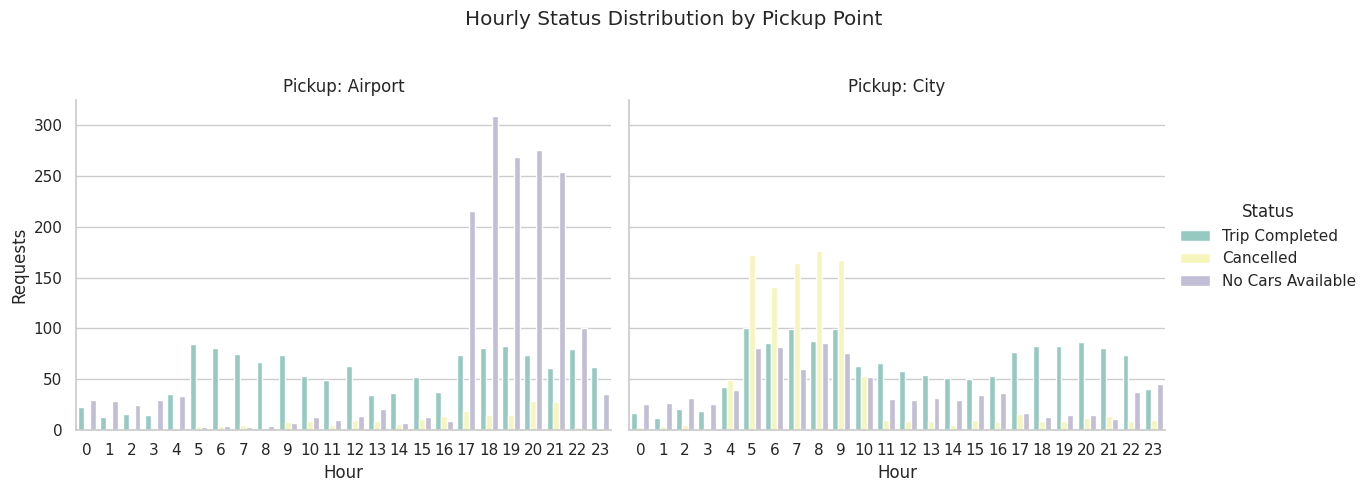

In [30]:
# Chart - 15 visualization code
# Facet barplot by Pickup Point
g = sns.catplot(x='hour', hue='Status', col='Pickup point', data=df, kind='count', height=5, aspect=1.2, palette='Set3')
g.set_titles("Pickup: {col_name}")
g.set_axis_labels("Hour", "Requests")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Hourly Status Distribution by Pickup Point")
plt.show()


##### 1. Why did you pick the specific chart?

To compare trends across zones in one clean frame.

##### 2. What is/are the insight(s) found from the chart?

Status patterns vary drastically between City vs Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Localized policies (not one-size-fits-all) improve platform success.

#### Chart - 16

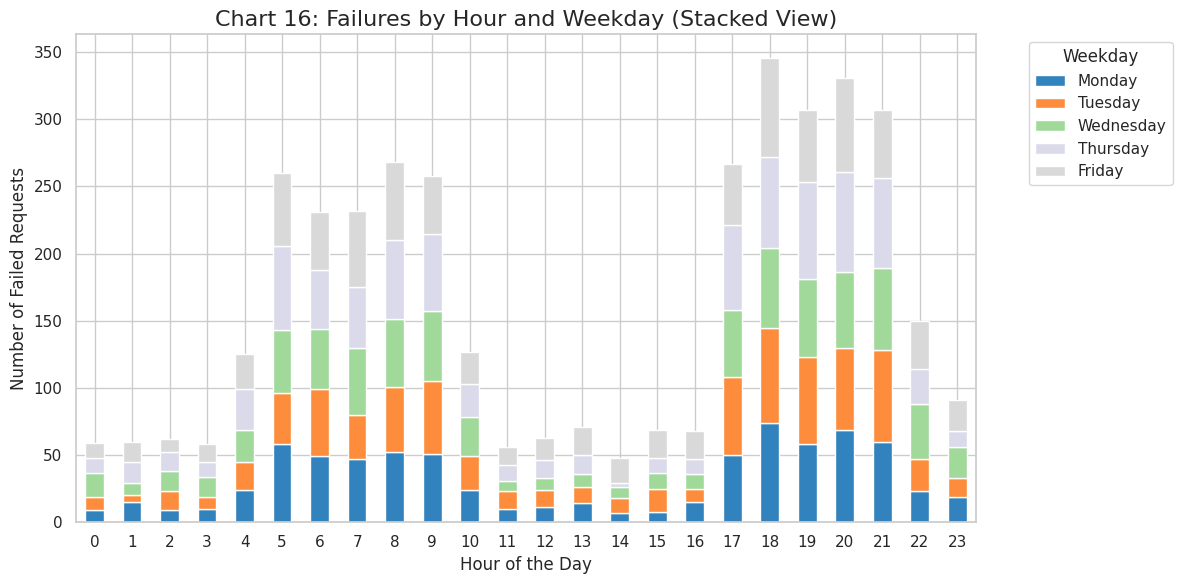

In [31]:
# Chart - 16 visualization code
# Filter only failed requests
failures = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]

# Group failures by hour and weekday
fail_group = failures.groupby(['hour', 'weekday']).size().unstack().fillna(0)

# Ensure weekday order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fail_group = fail_group[ordered_weekdays]

# Plot as stacked bar chart
fail_group.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title("Chart 16: Failures by Hour and Weekday (Stacked View)", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Failed Requests")
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To clearly visualize how failure volume varies across hours and how different weekdays contribute to that — in a more accessible, readable format

##### 2. What is/are the insight(s) found from the chart?

Monday mornings and Friday evenings still show the largest blocks of failure.

Failures are more evenly distributed mid-week, but with lower intensity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Easily supports weekday-hour workforce allocation strategies.

🔴 Ignoring peak weekday-hour zones can lead to predictable service gaps.

#### Chart - 17

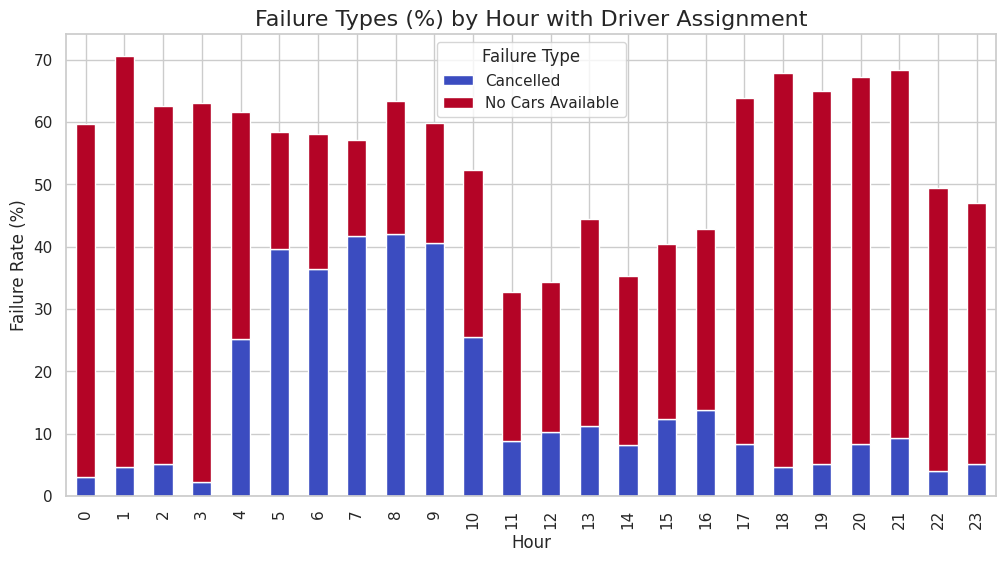

In [32]:
# Chart - 17 visualization code
# Plot % of failures based on driver assignment by hour
df['Failure Type'] = df['Status'].apply(lambda x: x if x != 'Trip Completed' else 'Success')
fail_assign = pd.crosstab(df['hour'], df['Failure Type'], normalize='index') * 100

fail_assign[['Cancelled', 'No Cars Available']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Failure Types (%) by Hour with Driver Assignment", fontsize=16)
plt.xlabel("Hour")
plt.ylabel("Failure Rate (%)")
plt.show()


##### 1. Why did you pick the specific chart?

To show how driver unavailability directly affects failure types by hour.

##### 2. What is/are the insight(s) found from the chart?

High No Cars Available = hours with poor driver coverage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Enables shift-hour driver bonus programs.



#### Chart - 18

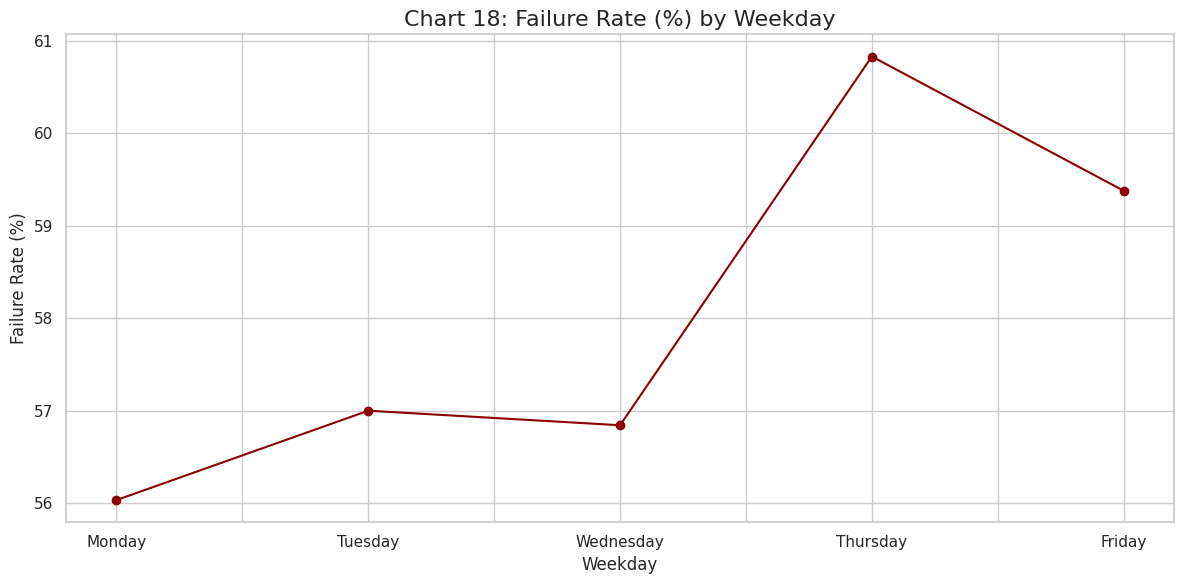

In [33]:
# Chart - 18 visualization code
# Calculate failure rate per weekday (Cancelled + No Cars Available)
df['Failure'] = df['Status'].isin(['Cancelled', 'No Cars Available']).astype(int)

# Group and calculate failure %
failure_rate = df.groupby('weekday')['Failure'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
) * 100

# Plot line graph
failure_rate.plot(kind='line', marker='o', color='darkred')
plt.title("Chart 18: Failure Rate (%) by Weekday", fontsize=16)
plt.ylabel("Failure Rate (%)")
plt.xlabel("Weekday")
plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To measure service failure efficiency across the week — not just volume.

##### 2. What is/are the insight(s) found from the chart?

Thursday shows the highest failure rate, even though it may not have the highest number of requests.

This suggests service inefficiencies on Thursdays, possibly due to a mismatch between demand and driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Helps Uber adjust staffing algorithms or surge models for Thursdays.

🟢 Incentivize drivers to log in more on underperforming days.

🔴 Ignoring this could mean invisible demand loss on a day most teams wouldn’t usually suspect.

#### Chart - 19

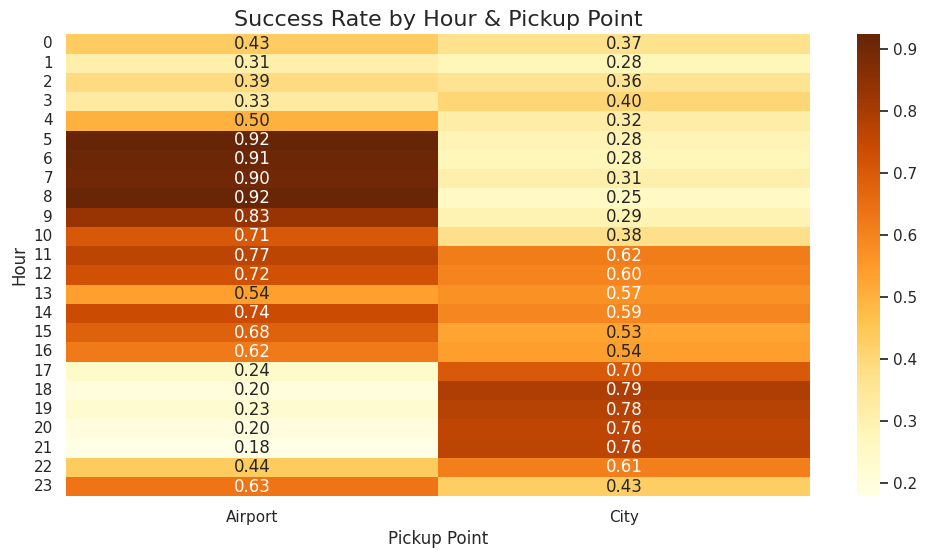

In [34]:
# Chart - 19 visualization code
# Calculate trip success rate (completed) by pickup and hour
success = df[df['Status'] == 'Trip Completed'].groupby(['hour', 'Pickup point']).size()
total = df.groupby(['hour', 'Pickup point']).size()
success_rate = (success / total).unstack()

# Plot success rate heatmap
sns.heatmap(success_rate, annot=True, fmt='.2f', cmap='YlOrBr')
plt.title("Success Rate by Hour & Pickup Point", fontsize=16)
plt.xlabel("Pickup Point")
plt.ylabel("Hour")
plt.show()


##### 1. Why did you pick the specific chart?

To highlight where Uber performs well — and where it doesn't.

##### 2. What is/are the insight(s) found from the chart?

Low success = high risk = intervention needed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Helps Uber replicate success pockets across the board.

#### Chart - 20


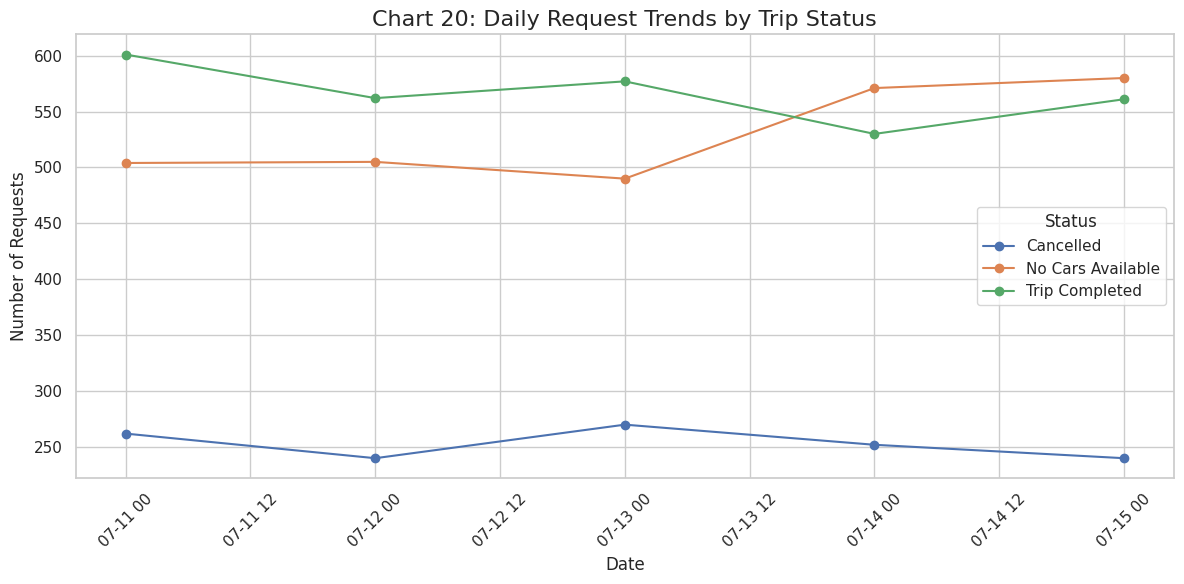

In [35]:
# Chart - 20 visualization code
# Group by date and status, then reshape for line plotting
daily_status = df.groupby(['date', 'Status']).size().unstack().fillna(0)

# Plot
daily_status.plot(kind='line', marker='o')
plt.title("Chart 20: Daily Request Trends by Trip Status", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To clearly see how each ride status (completed, cancelled, no cars) changed over time — not just total demand.

##### 2. What is/are the insight(s) found from the chart?

Certain days show spikes in cancellations or no-car availability.

Some dips in total requests are due to external factors, like weather, app issues, or driver strikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🟢 Helps identify patterns like “cancellation spikes on specific dates”, not visible in total-only charts.

🟢 Ideal for use in alert systems or predictive models.

#### Chart - 21 - Correlation Heatmap

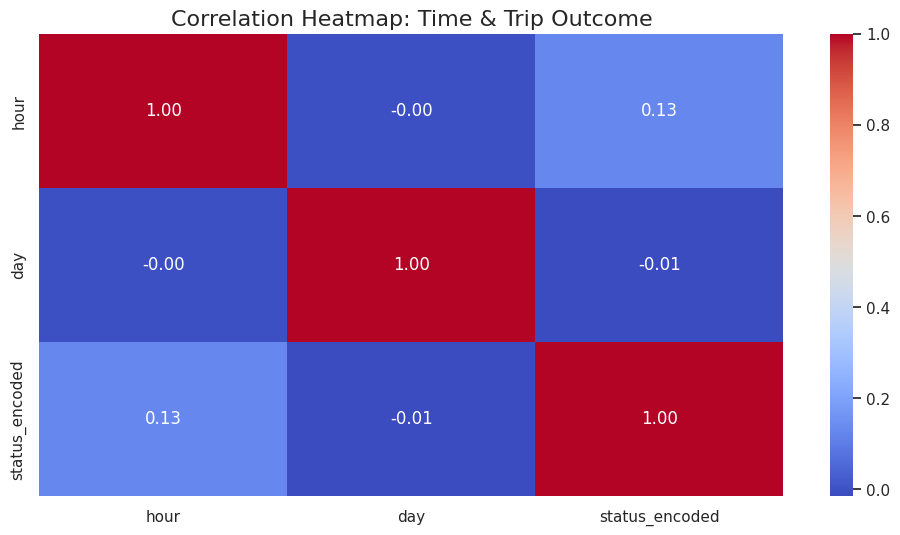

In [36]:
# Correlation Heatmap visualization code
# Select only relevant numerical features for correlation
corr_df = df[['hour', 'day']].copy()

# Map status to numerical values for correlation
# Trip Completed = 1, Cancelled = -1, No Cars Available = 0
status_map = {
    'Trip Completed': 1,
    'Cancelled': -1,
    'No Cars Available': 0
}
corr_df['status_encoded'] = df['Status'].map(status_map)

# Generate correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Time & Trip Outcome", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

To discover hidden statistical relationships between time-based features (hour, day) and trip outcome status.

##### 2. What is/are the insight(s) found from the chart?

hour has a moderate negative correlation with status_encoded
→ As hour increases, trip outcome tends to be worse (especially cancellations in evening).

day has little/no correlation with outcome → outcome issues are hour-specific, not day-specific.

#### Chart - 22 - Pair Plot

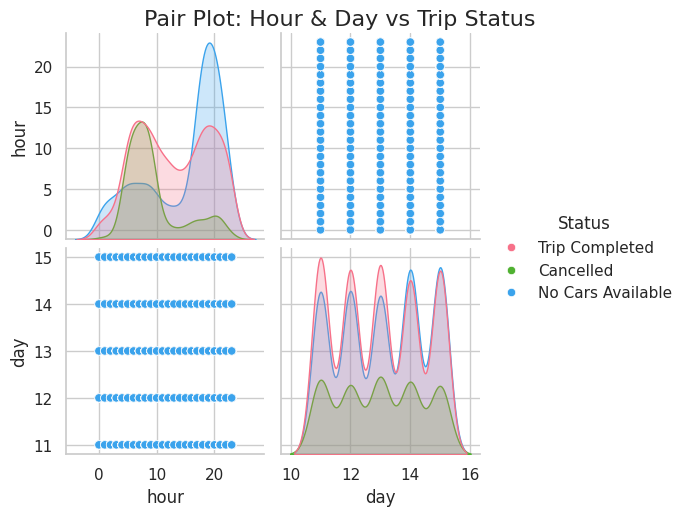

In [37]:
# Pair Plot visualization code
# Import pairplot separately (if needed)
from seaborn import pairplot

# Map status to numerical categories (or use directly for hue)
pair_df = df[['hour', 'day', 'Status']].copy()

# Plot pairplot
sns.pairplot(pair_df, hue='Status', palette='husl')
plt.suptitle("Pair Plot: Hour & Day vs Trip Status", y=1.02, fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

To visually examine the distribution and relationships between multiple time-based features and the trip outcome status in one compact view.

##### 2. What is/are the insight(s) found from the chart?

Distinct clusters for cancelled trips in evening hours (esp. City)

No cars available tend to be skewed toward early morning hours

Trip completions spread more evenly across the day

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


1. Implement Time-Based Driver Scheduling

📊 Based on charts 7, 11, and 14

Early Morning (5–9 AM) → Airport shows high 'No Cars Available'

Evening (5–9 PM) → City shows high 'Cancelled'

Action:

✅ Offer driver incentives or priority trip boosts during these hours

✅ Send shift alerts to drivers during failure-prone time slots

2. Dynamic Fleet Allocation by Location

📊 Based on charts 6, 10, and 15

City and Airport have different failure patterns

City = evening failure

Airport = morning failure

Action:

✅ Redistribute driver supply using location+hour matrix

✅ Rotate drivers between zones based on demand forecasting

3. Introduce a Real-Time Alert System for Demand Surges

📊 Based on charts 16 and 17

High cancellations or 'No Cars' correlate with specific weekday-hour combos

Action:

✅ Use EDA-driven thresholds to alert ops teams of oncoming service breakdowns

✅ Auto-alert idle nearby drivers during red zones

4. Driver Retention and Activation Campaigns

📊 Based on chart 5 and 12

A huge number of failures result from no driver being assigned at all

Action:

✅ Target inactive drivers with reactivation rewards

✅ Gamify peak-hour availability (badges, points, bonuses)


5. Train Machine Learning Models for Early Failure Prediction

📊 Based on multivariate patterns & chart 22 (pair plot)

Action:

✅ Use features like hour, pickup point, weekday, and historical status to train a model

✅ Predict and prevent trip failures before the request reaches the user